In [1]:
import json
import datetime

import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import numpy as np

In [2]:
# unpickling
df = pd.read_pickle('./earthquakes_with_coordinates.pkl')
df.head()

,id,mag,time,latitude,longitude,height
0,1,1.93,1995-01-28 00:58:26,37.4395,-118.687167,4.901
1,2,1.90,1995-01-28 00:55:35,34.4180,-116.486000,4.484
2,3,3.50,1995-01-28 00:53:30,36.0450,-1.075000,33.000
3,4,1.76,1995-01-28 00:44:05,40.4540,-123.886833,3.975
4,5,1.62,1995-01-28 00:39:14,35.0330,-117.683000,-0.935


In [20]:
xmin, ymin, xmax, ymax = -180, -90, 180, 90

length = 1000
wide = 1200

cols = list(np.arange(xmin, xmax + wide, wide))
rows = list(np.arange(ymin, ymax + length, length))

polygons = []
for x in cols[:-1]:
    for y in rows[:-1]:
        polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))

grid = gpd.GeoDataFrame({'geometry':polygons})
grid
# grid.to_file("grid.shp")

,geometry
0,"POLYGON ((-180.000 -90.000, 1020.000 -90.000, ..."


In [60]:
df = pd.DataFrame()
df['x'] = [-170, -160, 50]
df['y'] = [-80, -70, 21]
df['dob'] = [100, 200, 10]
gdf = gpd.GeoDataFrame(df,
            geometry=gpd.points_from_xy(df.x, df.y),
            crs="+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs")
gdf.head()

,x,y,dob,geometry
0,-170,-80,100,POINT (-170.000 -80.000)
1,-160,-70,200,POINT (-160.000 -70.000)
2,50,21,10,POINT (50.000 21.000)


(-181.0, 61.0, -85.05, 26.05)

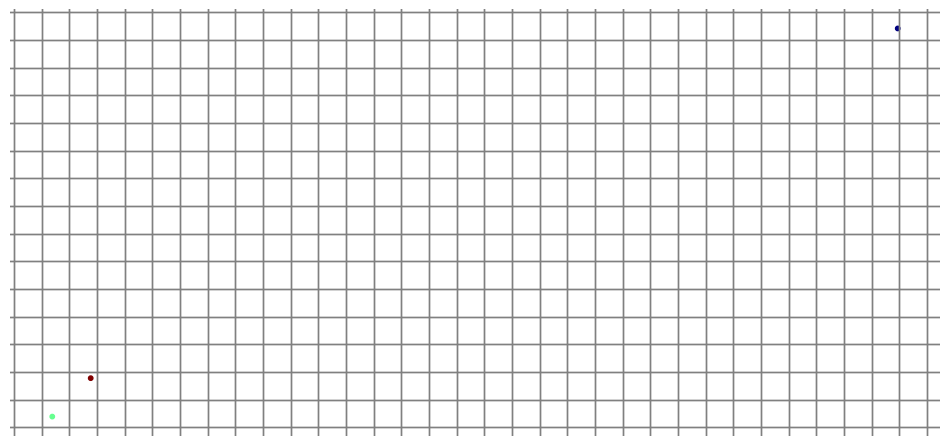

In [24]:
# total area for the grid
xmin, ymin, xmax, ymax = -180, -90, 180, 90
# how many cells across and down
n_cells=50
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'],
                                 crs=crs)

ax = gdf.plot(markersize=10, figsize=(12, 8), column='dob', cmap='jet')
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [82]:
xmin, ymin, xmax, ymax = -180, -90, 180, 90

n_cells=100
cell_size = (xmax-xmin)/n_cells

grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs='epsg:4326')
# cell = cell.set_crs('epsg:4326')
cell

,geometry
0,"POLYGON ((-183.60000 -90.00000, -183.60000 -86..."
1,"POLYGON ((-183.60000 -86.40000, -183.60000 -82..."
2,"POLYGON ((-183.60000 -82.80000, -183.60000 -79..."
3,"POLYGON ((-183.60000 -79.20000, -183.60000 -75..."
4,"POLYGON ((-183.60000 -75.60000, -183.60000 -72..."
...,...
5146,"POLYGON ((176.40000 75.60000, 176.40000 79.200..."
5147,"POLYGON ((176.40000 79.20000, 176.40000 82.800..."
5148,"POLYGON ((176.40000 82.80000, 176.40000 86.400..."
5149,"POLYGON ((176.40000 86.40000, 176.40000 90.000..."


In [83]:
# pickling grid
# cell.to_pickle('./grid.pkl')
# cell.to_pickle('./grid_800.pkl')
# cell.to_pickle('./grid_400.pkl')
cell.to_pickle('./grid_100.pkl')

In [3]:
# unickling grid
# grid = pd.read_pickle('./grid.pkl')
# grid = pd.read_pickle('./grid_800.pkl')
grid = pd.read_pickle('./grid_100.pkl')

In [9]:
grid.iloc[1055]

geometry    POLYGON ((-111.60000 36.00000, -111.60000 39.6...
Name: 1055, dtype: geometry

In [32]:
# min - 1995-01-21
# max - 2023-03-21

Timestamp('2023-03-21 22:32:59')

# Trzęsienia ziemi powyzej magnituda 3.0

In [11]:
mag_3 = df[df['mag'] >= 3.0]

In [12]:
gdf_mag_3 = gpd.GeoDataFrame(mag_3, geometry=gpd.points_from_xy(mag_3['longitude'], mag_3['latitude']), crs="EPSG:4326")
gdf_mag_3

,id,mag,time,latitude,longitude,height,geometry
2,3,3.50,1995-01-28 00:53:30,36.045000,-1.075000,33.000,POINT (-1.07500 36.04500)
6,7,4.70,1995-01-28 00:17:59,-4.858000,133.977000,33.000,POINT (133.97700 -4.85800)
9,10,4.30,1995-01-28 00:04:07,28.163000,56.762000,56.800,POINT (56.76200 28.16300)
11,12,4.90,1995-01-27 23:40:32,-4.133000,134.929000,33.000,POINT (134.92900 -4.13300)
14,15,4.90,1995-01-27 23:33:58,-4.941000,133.868000,33.000,POINT (133.86800 -4.94100)
...,...,...,...,...,...,...,...
3292326,3292327,3.28,2023-03-21 05:16:22,18.958167,-67.185333,14.870,POINT (-67.18533 18.95817)
3292331,3292332,3.80,2023-03-21 04:54:40,9.594800,-83.957400,30.629,POINT (-83.95740 9.59480)
3292357,3292358,5.20,2023-03-21 02:45:21,23.517600,121.387400,11.587,POINT (121.38740 23.51760)
3292358,3292359,5.50,2023-03-21 02:44:13,9.359900,-84.094300,35.000,POINT (-84.09430 9.35990)


In [63]:
grid

,geometry
0,"POLYGON ((-183.60000 -90.00000, -183.60000 -86..."
1,"POLYGON ((-183.60000 -86.40000, -183.60000 -82..."
2,"POLYGON ((-183.60000 -82.80000, -183.60000 -79..."
3,"POLYGON ((-183.60000 -79.20000, -183.60000 -75..."
4,"POLYGON ((-183.60000 -75.60000, -183.60000 -72..."
...,...
5146,"POLYGON ((176.40000 75.60000, 176.40000 79.200..."
5147,"POLYGON ((176.40000 79.20000, 176.40000 82.800..."
5148,"POLYGON ((176.40000 82.80000, 176.40000 86.400..."
5149,"POLYGON ((176.40000 86.40000, 176.40000 90.000..."


In [15]:
# spatial join - points inside polygons
joined = gpd.sjoin(gdf_mag_3, grid, how="left", op="within")
joined

C:\Users\sirko\.conda\envs\backend\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,id,mag,time,latitude,longitude,height,geometry,index_right
2,3,3.50,1995-01-28 00:53:30,36.045000,-1.075000,33.000,POINT (-1.07500 36.04500),2585.0
6,7,4.70,1995-01-28 00:17:59,-4.858000,133.977000,33.000,POINT (133.97700 -4.85800),4511.0
9,10,4.30,1995-01-28 00:04:07,28.163000,56.762000,56.800,POINT (56.76200 28.16300),3398.0
11,12,4.90,1995-01-27 23:40:32,-4.133000,134.929000,33.000,POINT (134.92900 -4.13300),4511.0
14,15,4.90,1995-01-27 23:33:58,-4.941000,133.868000,33.000,POINT (133.86800 -4.94100),4511.0
...,...,...,...,...,...,...,...,...
3292326,3292327,3.28,2023-03-21 05:16:22,18.958167,-67.185333,14.870,POINT (-67.18533 18.95817),1662.0
3292331,3292332,3.80,2023-03-21 04:54:40,9.594800,-83.957400,30.629,POINT (-83.95740 9.59480),1404.0
3292357,3292358,5.20,2023-03-21 02:45:21,23.517600,121.387400,11.587,POINT (121.38740 23.51760),4315.0
3292358,3292359,5.50,2023-03-21 02:44:13,9.359900,-84.094300,35.000,POINT (-84.09430 9.35990),1404.0


In [20]:
# max magnitude in specific polygons
max_values = joined.groupby('index_right')['mag'].max()
max_values

index_right
228      6.2
244      4.6
253      4.6
255      4.6
256      4.9
        ... 
80559    4.3
80566    4.1
80569    4.6
80570    4.8
80574    5.2
Name: mag, Length: 12882, dtype: float64

In [ ]:
# polygons with max

In [14]:
start_date = '1995-01-21'
end_date = '2023-03-21'

# Create a DataFrame with each day between start_date and end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df_dates = pd.DataFrame({'date': date_range})
df_dates

,date
0,1995-01-21
1,1995-01-22
2,1995-01-23
3,1995-01-24
4,1995-01-25
...,...
10282,2023-03-17
10283,2023-03-18
10284,2023-03-19
10285,2023-03-20


In [ ]:
result = pd.DataFrame()

# Iterate over each row in gdf_polygons
for index, row in grid.iterrows():
    # Get the polygon geometry
    geometry = row['geometry']
    # print(geometry)

    # # Merge the polygon with df_dates to create multiple rows, one for each date
    merged = pd.merge(row, df_dates, how='cross')
    # print(merged)
    # break
    # # Add the merged DataFrame to the result
    result = pd.concat([result, merged], ignore_index=True)

# Convert the result DataFrame to a GeoDataFrame
gdf_result = gpd.GeoDataFrame(result, geometry='geometry')

POLYGON ((-180.45 -74.6999999999999, -180.45 -74.2499999999999, -180 -74.2499999999999, -180 -74.6999999999999, -180.45 -74.6999999999999))
POLYGON ((-180.45 -74.2499999999999, -180.45 -73.7999999999999, -180 -73.7999999999999, -180 -74.2499999999999, -180.45 -74.2499999999999))
POLYGON ((-180.45 -73.7999999999999, -180.45 -73.34999999999989, -180 -73.34999999999989, -180 -73.7999999999999, -180.45 -73.7999999999999))
POLYGON ((-180.45 -73.34999999999989, -180.45 -72.89999999999989, -180 -72.89999999999989, -180 -73.34999999999989, -180.45 -73.34999999999989))
POLYGON ((-180.45 -72.89999999999989, -180.45 -72.44999999999989, -180 -72.44999999999989, -180 -72.89999999999989, -180.45 -72.89999999999989))
POLYGON ((-180.45 -72.44999999999989, -180.45 -71.99999999999989, -180 -71.99999999999989, -180 -72.44999999999989, -180.45 -72.44999999999989))
POLYGON ((-180.45 -71.99999999999989, -180.45 -71.54999999999988, -180 -71.54999999999988, -180 -71.99999999999989, -180.45 -71.99999999999989)


KeyboardInterrupt



In [ ]:
gdf_result

In [60]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs='epsg:4326')

In [61]:
gdf

,id,mag,time,latitude,longitude,height,geometry
0,1,1.93,1995-01-28 00:58:26,37.439500,-118.687167,4.901,POINT (-118.68717 37.43950)
1,2,1.90,1995-01-28 00:55:35,34.418000,-116.486000,4.484,POINT (-116.48600 34.41800)
2,3,3.50,1995-01-28 00:53:30,36.045000,-1.075000,33.000,POINT (-1.07500 36.04500)
3,4,1.76,1995-01-28 00:44:05,40.454000,-123.886833,3.975,POINT (-123.88683 40.45400)
4,5,1.62,1995-01-28 00:39:14,35.033000,-117.683000,-0.935,POINT (-117.68300 35.03300)
...,...,...,...,...,...,...,...
3292372,3292373,1.00,2023-03-21 01:22:45,58.205500,-155.127300,14.400,POINT (-155.12730 58.20550)
3292373,3292374,4.50,2023-03-21 01:20:14,38.997100,21.137600,10.000,POINT (21.13760 38.99710)
3292374,3292375,1.00,2023-03-21 01:16:18,63.526200,-148.426700,6.800,POINT (-148.42670 63.52620)
3292375,3292376,1.06,2023-03-21 01:06:09,37.604000,-121.722833,5.990,POINT (-121.72283 37.60400)


In [74]:
# get polygon for specific row
joined_gdf = gpd.sjoin(gdf, grid, how="left", op="within")
joined_gdf

In [65]:
# add polygon geometry
joined_gdf['polygon_geometry'] = joined_gdf['index_right'].apply(lambda x: grid.iloc[int(x)].geometry)

ValueError: cannot convert float NaN to integer

In [81]:
joined_gdf

In [30]:
# joined[['index_right'] == 1055]
california_polygon = joined.loc[joined['index_right'] == 1050]
# california_polygon.to_datetime(df['date']).cali.date

,id,mag,time,latitude,longitude,height,geometry,index_right
22727,22674,4.6,1995-06-13 00:18:48,19.5290,-109.1800,10.0,POINT (-109.18000 19.52900),1050.0
41914,41802,4.4,1995-09-13 15:54:10,19.3610,-108.3430,10.0,POINT (-108.34300 19.36100),1050.0
61399,61246,4.1,1995-11-28 14:18:06,19.6720,-108.3100,10.0,POINT (-108.31000 19.67200),1050.0
78551,78378,3.8,1996-02-18 22:06:40,19.8310,-109.1930,33.0,POINT (-109.19300 19.83100),1050.0
79421,79249,4.7,1996-02-22 21:13:43,19.7140,-109.2620,10.0,POINT (-109.26200 19.71400),1050.0
...,...,...,...,...,...,...,...,...
3249833,3249810,4.1,2022-12-05 19:21:15,19.5245,-109.0216,10.0,POINT (-109.02160 19.52450),1050.0
3250129,3250104,4.5,2022-12-05 02:33:33,19.4999,-109.2055,10.0,POINT (-109.20550 19.49990),1050.0
3253593,3253555,4.2,2022-12-14 09:46:19,19.4670,-108.3959,10.0,POINT (-108.39590 19.46700),1050.0
3256557,3256521,5.3,2022-12-21 17:54:24,19.4737,-108.6682,10.0,POINT (-108.66820 19.47370),1050.0


In [76]:
california_polygon = joined.loc[joined['index_right'] == 952]  # california
# california_polygon.to_datetime(df['date']).cali.date

In [71]:
california_polygon = joined.loc[joined['index_right'] == 2842]  # wlochy
# california_polygon.to_datetime(df['date']).cali.date

In [74]:
california_polygon = joined.loc[joined['index_right'] == 4573]  # japonia
# california_polygon.to_datetime(df['date']).cali.date

In [124]:
# df_with_dates['date']
max_values = df_with_dates.groupby('date')['mag'].max()
max_values
df_with_dates = max_values.reset_index()

# Rename columns if needed
df_with_dates.columns = ['date', 'mag']
df_with_dates

,date,mag
0,1995-02-08,3.39
1,1995-02-15,3.20
2,1995-02-19,3.50
3,1995-02-22,3.11
4,1995-02-26,3.20
...,...,...
2155,2023-02-02,3.11
2156,2023-02-13,3.24
2157,2023-02-28,3.56
2158,2023-03-13,3.09


In [128]:
from copy import deepcopy
# df_with_dates = deepcopy(california_polygon)
# df_with_dates['date'] = df_with_dates['time'].dt.date
# df_with_dates['date']
# df_with_dates['date'] = pd.to_datetime(df_with_dates['date'])
# df_with_dates['date']

earthquakes_all_dates = df_dates.merge(df_with_dates, how='left', left_on='date', right_on='date')
# earthquakes_all_dates[earthquakes_all_dates['mag'] == np.nan]['mag'] = 0
earthquakes_all_dates['mag'].replace(np.nan, 0, inplace=True)
earthquakes_all_dates['is_earthquake'] = earthquakes_all_dates['mag'].apply(lambda x: 1 if x > 0 else 0)
earthquakes_all_dates

,date,mag,is_earthquake
0,1995-01-21,0.00,0
1,1995-01-22,0.00,0
2,1995-01-23,0.00,0
3,1995-01-24,0.00,0
4,1995-01-25,0.00,0
...,...,...,...
10282,2023-03-17,0.00,0
10283,2023-03-18,3.56,1
10284,2023-03-19,0.00,0
10285,2023-03-20,0.00,0


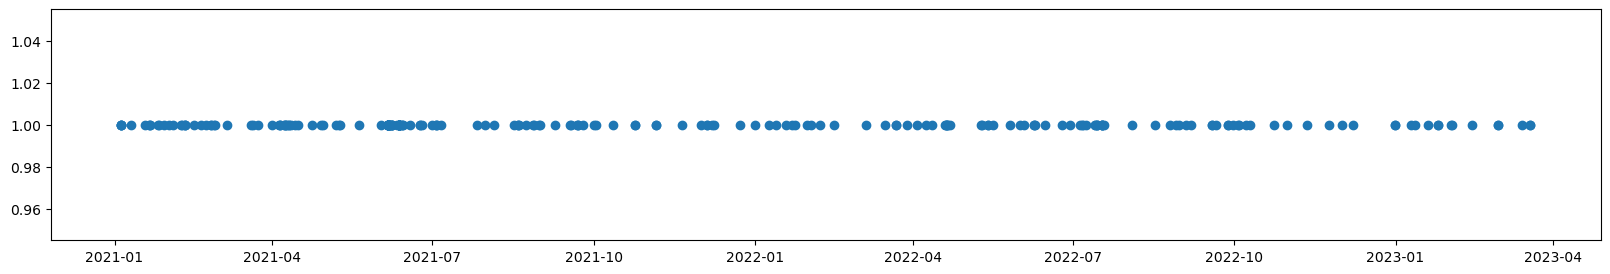

In [98]:
import matplotlib.pyplot as plt
from datetime import date
# plt.show(california_polygon['time'])
# plt.scatter(california_polygon["time"], california_polygon["mag"])
# california_polygon[california_polygon['mag'] > 5].shape[0]*[1]
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(
    california_polygon[(california_polygon['mag'] > 0)& (california_polygon['time'].dt.date > date(2021, 1, 1))]['time'],
    california_polygon[(california_polygon['mag'] > 0)& (california_polygon['time'].dt.date > date(2021, 1, 1))].shape[0]*[1])

In [134]:
earthquakes_2021 = earthquakes_all_dates[(earthquakes_all_dates['date'].dt.date > date(2021, 1, 1)) & (earthquakes_all_dates['date'].dt.date < date(2022, 3, 1))]
earthquakes_2021['date']
# earthquakes_2021_series = earthquakes_2021.set_index('date')['is_earthquake']
# earthquakes_2021_series
# plt.scatter(
    # earthquakes_all_dates[(earthquakes_all_dates['date'].dt.date > date(2021, 1, 1))]['date'],
    # earthquakes_all_dates[(earthquakes_all_dates['date'].dt.date > date(2021, 1, 1))]['is_earthquake'])

9478   2021-01-02
9479   2021-01-03
9480   2021-01-04
9481   2021-01-05
9482   2021-01-06
          ...    
9896   2022-02-24
9897   2022-02-25
9898   2022-02-26
9899   2022-02-27
9900   2022-02-28
Name: date, Length: 423, dtype: datetime64[ns]

In [137]:
train_data, test_data = earthquakes_2021.iloc[:364], earthquakes_2021.iloc[364:]


,date,mag,is_earthquake
9842,2022-01-01,0.0,0
9843,2022-01-02,0.0,0
9844,2022-01-03,0.0,0
9845,2022-01-04,0.0,0
9846,2022-01-05,0.0,0


In [138]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [140]:
model = pm.auto_arima(train_data['is_earthquake'],
                      # m=12,               # frequency of series
                      seasonal=False,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=12, max_q=12, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=492.469, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=464.343, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=471.264, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=457.769, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=447.791, Time=0.10 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

 ARIMA(4,0,0)(0,0,0)[0]             : AIC=440.271, Time=0.14 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=429.845, Time=0.20 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

 ARIMA(6,0,0)(0,0,0)[0]             : AIC=430.895, Time=0.21 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=411.432, Time=0.93 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=410.138, Time=0.64 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=408.587, Time=0.49 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=406.785, Time=0.35 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=406.138, Time=0.27 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=406.717, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=467.055, Time=0.09 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=407.432, Time=0.72 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=402.557, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=401.496, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=401.559, Time=0.07 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=403.450, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=401.544, Time=0.06 sec


C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=403.553, Time=0.86 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 6.527 seconds


In [141]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  364
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -197.748
Date:                Sat, 20 Apr 2024   AIC                            401.496
Time:                        19:37:43   BIC                            413.188
Sample:                             0   HQIC                           406.143
                                - 364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2254      0.331      0.681      0.496      -0.423       0.874
ma.L1          0.0766      0.098      0.779      0.436      -0.116       0.269
sigma2         0.1735      0.194      0.895      0.3

In [145]:
predicted, confint = model.predict(n_periods=59, return_conf_int=True)

C:\Users\sirko\.conda\envs\backend\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sirko\.conda\envs\backend\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

In [146]:
predicted

364    0.285943
365    0.225392
366    0.225392
367    0.225392
368    0.225392
369    0.225392
370    0.225392
371    0.225392
372    0.225392
373    0.225392
374    0.225392
375    0.225392
376    0.225392
377    0.225392
378    0.225392
379    0.225392
380    0.225392
381    0.225392
382    0.225392
383    0.225392
384    0.225392
385    0.225392
386    0.225392
387    0.225392
388    0.225392
389    0.225392
390    0.225392
391    0.225392
392    0.225392
393    0.225392
394    0.225392
395    0.225392
396    0.225392
397    0.225392
398    0.225392
399    0.225392
400    0.225392
401    0.225392
402    0.225392
403    0.225392
404    0.225392
405    0.225392
406    0.225392
407    0.225392
408    0.225392
409    0.225392
410    0.225392
411    0.225392
412    0.225392
413    0.225392
414    0.225392
415    0.225392
416    0.225392
417    0.225392
418    0.225392
419    0.225392
420    0.225392
421    0.225392
422    0.225392
dtype: float64

In [144]:
test_data

,date,mag,is_earthquake
9842,2022-01-01,0.00,0
9843,2022-01-02,0.00,0
9844,2022-01-03,0.00,0
9845,2022-01-04,0.00,0
9846,2022-01-05,0.00,0
9847,2022-01-06,0.00,0
9848,2022-01-07,0.00,0
9849,2022-01-08,0.00,0
9850,2022-01-09,3.21,1
9851,2022-01-10,0.00,0


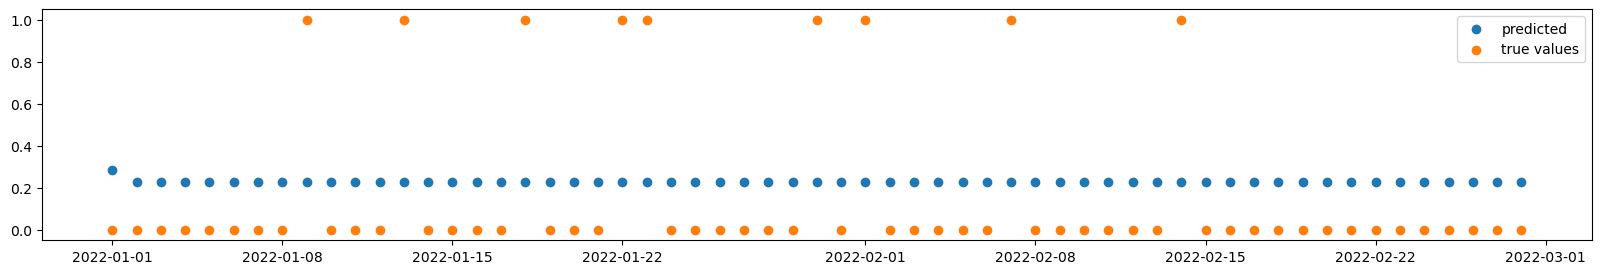

In [152]:
days = test_data['date']
plt.scatter(days, predicted, label='predicted')
plt.scatter(days, test_data['is_earthquake'], label='true values')
plt.legend()